## Hurricane Analysis

In [71]:
# names of hurricanes
names = ['Cuba I', 'San Felipe II Okeechobee', 'Bahamas', 'Cuba II', 'CubaBrownsville', 'Tampico', 'Labor Day', 'New England', 'Carol', 'Janet', 'Carla', 'Hattie', 'Beulah', 'Camille', 'Edith', 'Anita', 'David', 'Allen', 'Gilbert', 'Hugo', 'Andrew', 'Mitch', 'Isabel', 'Ivan', 'Emily', 'Katrina', 'Rita', 'Wilma', 'Dean', 'Felix', 'Matthew', 'Irma', 'Maria', 'Michael']

# months of hurricanes
months = ['October', 'September', 'September', 'November', 'August', 'September', 'September', 'September', 'September', 'September', 'September', 'October', 'September', 'August', 'September', 'September', 'August', 'August', 'September', 'September', 'August', 'October', 'September', 'September', 'July', 'August', 'September', 'October', 'August', 'September', 'October', 'September', 'September', 'October']

# years of hurricanes
years = [1924, 1928, 1932, 1932, 1933, 1933, 1935, 1938, 1953, 1955, 1961, 1961, 1967, 1969, 1971, 1977, 1979, 1980, 1988, 1989, 1992, 1998, 2003, 2004, 2005, 2005, 2005, 2005, 2007, 2007, 2016, 2017, 2017, 2018]

# maximum sustained winds (mph) of hurricanes
max_sustained_winds = [165, 160, 160, 175, 160, 160, 185, 160, 160, 175, 175, 160, 160, 175, 160, 175, 175, 190, 185, 160, 175, 180, 165, 165, 160, 175, 180, 185, 175, 175, 165, 180, 175, 160]

# areas affected by each hurricane
areas_affected = [['Central America', 'Mexico', 'Cuba', 'Florida', 'The Bahamas'], ['Lesser Antilles', 'The Bahamas', 'United States East Coast', 'Atlantic Canada'], ['The Bahamas', 'Northeastern United States'], ['Lesser Antilles', 'Jamaica', 'Cayman Islands', 'Cuba', 'The Bahamas', 'Bermuda'], ['The Bahamas', 'Cuba', 'Florida', 'Texas', 'Tamaulipas'], ['Jamaica', 'Yucatn Peninsula'], ['The Bahamas', 'Florida', 'Georgia', 'The Carolinas', 'Virginia'], ['Southeastern United States', 'Northeastern United States', 'Southwestern Quebec'], ['Bermuda', 'New England', 'Atlantic Canada'], ['Lesser Antilles', 'Central America'], ['Texas', 'Louisiana', 'Midwestern United States'], ['Central America'], ['The Caribbean', 'Mexico', 'Texas'], ['Cuba', 'United States Gulf Coast'], ['The Caribbean', 'Central America', 'Mexico', 'United States Gulf Coast'], ['Mexico'], ['The Caribbean', 'United States East coast'], ['The Caribbean', 'Yucatn Peninsula', 'Mexico', 'South Texas'], ['Jamaica', 'Venezuela', 'Central America', 'Hispaniola', 'Mexico'], ['The Caribbean', 'United States East Coast'], ['The Bahamas', 'Florida', 'United States Gulf Coast'], ['Central America', 'Yucatn Peninsula', 'South Florida'], ['Greater Antilles', 'Bahamas', 'Eastern United States', 'Ontario'], ['The Caribbean', 'Venezuela', 'United States Gulf Coast'], ['Windward Islands', 'Jamaica', 'Mexico', 'Texas'], ['Bahamas', 'United States Gulf Coast'], ['Cuba', 'United States Gulf Coast'], ['Greater Antilles', 'Central America', 'Florida'], ['The Caribbean', 'Central America'], ['Nicaragua', 'Honduras'], ['Antilles', 'Venezuela', 'Colombia', 'United States East Coast', 'Atlantic Canada'], ['Cape Verde', 'The Caribbean', 'British Virgin Islands', 'U.S. Virgin Islands', 'Cuba', 'Florida'], ['Lesser Antilles', 'Virgin Islands', 'Puerto Rico', 'Dominican Republic', 'Turks and Caicos Islands'], ['Central America', 'United States Gulf Coast (especially Florida Panhandle)']]

# damages (USD($)) of hurricanes
damages = ['Damages not recorded', '100M', 'Damages not recorded', '40M', '27.9M', '5M', 'Damages not recorded', '306M', '2M', '65.8M', '326M', '60.3M', '208M', '1.42B', '25.4M', 'Damages not recorded', '1.54B', '1.24B', '7.1B', '10B', '26.5B', '6.2B', '5.37B', '23.3B', '1.01B', '125B', '12B', '29.4B', '1.76B', '720M', '15.1B', '64.8B', '91.6B', '25.1B']

# deaths for each hurricane
deaths = [90,4000,16,3103,179,184,408,682,5,1023,43,319,688,259,37,11,2068,269,318,107,65,19325,51,124,17,1836,125,87,45,133,603,138,3057,74]

#### Before start~


The data here is very messy. Put them into a DataFrame for better representation.  Save the DataFrame to `hurricane_df`.

In [72]:
### Your code here
import numpy as np 
import pandas as pd

hurricane_df = pd.DataFrame({
    "names":names,
    "months": months,
    "years":years,
    "max_sustained_winds":max_sustained_winds,
    "areas_affected":areas_affected,
    "damages":damages,
    "deaths":deaths
})

print(hurricane_df)


                       names     months  years  max_sustained_winds  \
0                     Cuba I    October   1924                  165   
1   San Felipe II Okeechobee  September   1928                  160   
2                    Bahamas  September   1932                  160   
3                    Cuba II   November   1932                  175   
4            CubaBrownsville     August   1933                  160   
5                    Tampico  September   1933                  160   
6                  Labor Day  September   1935                  185   
7                New England  September   1938                  160   
8                      Carol  September   1953                  160   
9                      Janet  September   1955                  175   
10                     Carla  September   1961                  175   
11                    Hattie    October   1961                  160   
12                    Beulah  September   1967                  160   
13    

#### Exercise 1

Begin by looking at the damages list. The list contains strings representing the total cost in USD($) caused by 34 category 5 hurricanes (wind speeds ≥ 157 mph (252 km/h )) in the Atlantic region. For some of the hurricanes, damage data was not recorded ("Damages not recorded"), while the rest are written in the format "Prefix-B/M", where B stands for billions (1,000,000,000) and M stands for millions (1,000,000).

- Transform the values of "xxxM" and "yyyB" into actual numbers (integer or float).  
- "Damages not recorded" should be changed to `np.nan`

Hint: You need to use `.apply`

In [73]:
### Your code here
def convert_damages(row):
    damage_txt=row['damages']
    #or uses damage_txt.endswith('B')
    if damage_txt[-1]=='M':
        damage_val = float(damage_txt[:-1])*1000000
    elif damage_txt[-1]=='B':
        damage_val = float(damage_txt[:-1])*1000000000
    else:
        damage_val=np.nan
    return damage_val

hurricane_df['damages_num']=hurricane_df.apply(convert_damages,axis=1)
#actually if you put in a series instead of dataframe 
#you can apply series function: hurricane_df['damages'].apply(convert_damage)

hurricane_df


,names,months,years,max_sustained_winds,areas_affected,damages,deaths,damages_num
0,Cuba I,October,1924,165,"[Central America, Mexico, Cuba, Florida, The B...",Damages not recorded,90,NaN
1,San Felipe II Okeechobee,September,1928,160,"[Lesser Antilles, The Bahamas, United States E...",100M,4000,1.000000e+08
2,Bahamas,September,1932,160,"[The Bahamas, Northeastern United States]",Damages not recorded,16,NaN
3,Cuba II,November,1932,175,"[Lesser Antilles, Jamaica, Cayman Islands, Cub...",40M,3103,4.000000e+07
4,CubaBrownsville,August,1933,160,"[The Bahamas, Cuba, Florida, Texas, Tamaulipas]",27.9M,179,2.790000e+07
5,Tampico,September,1933,160,"[Jamaica, Yucatn Peninsula]",5M,184,5.000000e+06
6,Labor Day,September,1935,185,"[The Bahamas, Florida, Georgia, The Carolinas,...",Damages not recorded,408,NaN
7,New England,September,1938,160,"[Southeastern United States, Northeastern Unit...",306M,682,3.060000e+08
8,Carol,September,1953,160,"[Bermuda, New England, Atlantic Canada]",2M,5,2.000000e+06
9,Janet,September,1955,175,"[Lesser Antilles, Central America]",65.8M,1023,6.580000e+07


#### Exercise 2

Turn each row of record into dictionary.  Then use a large dictioanary to contain them.

Your output should looks like:

```python
{
    "Cuba I": {"month": "October", ......},
    "San Felipe II Okeechobee": {"month": "Septemper", ......},
    "Bahamas": {"month": "Septemper", ......},
}
```

Hint: Read the documentation of `df.to_dict()`


In [74]:
### Your code here

hurricane_dict = hurricane_df.set_index("names").to_dict(orient='index')

print(hurricane_dict)

hurricane_df

{'Cuba I': {'months': 'October', 'years': 1924, 'max_sustained_winds': 165, 'areas_affected': ['Central America', 'Mexico', 'Cuba', 'Florida', 'The Bahamas'], 'damages': 'Damages not recorded', 'deaths': 90, 'damages_num': nan}, 'San Felipe II Okeechobee': {'months': 'September', 'years': 1928, 'max_sustained_winds': 160, 'areas_affected': ['Lesser Antilles', 'The Bahamas', 'United States East Coast', 'Atlantic Canada'], 'damages': '100M', 'deaths': 4000, 'damages_num': 100000000.0}, 'Bahamas': {'months': 'September', 'years': 1932, 'max_sustained_winds': 160, 'areas_affected': ['The Bahamas', 'Northeastern United States'], 'damages': 'Damages not recorded', 'deaths': 16, 'damages_num': nan}, 'Cuba II': {'months': 'November', 'years': 1932, 'max_sustained_winds': 175, 'areas_affected': ['Lesser Antilles', 'Jamaica', 'Cayman Islands', 'Cuba', 'The Bahamas', 'Bermuda'], 'damages': '40M', 'deaths': 3103, 'damages_num': 40000000.0}, 'CubaBrownsville': {'months': 'August', 'years': 1933, 'm

,names,months,years,max_sustained_winds,areas_affected,damages,deaths,damages_num
0,Cuba I,October,1924,165,"[Central America, Mexico, Cuba, Florida, The B...",Damages not recorded,90,NaN
1,San Felipe II Okeechobee,September,1928,160,"[Lesser Antilles, The Bahamas, United States E...",100M,4000,1.000000e+08
2,Bahamas,September,1932,160,"[The Bahamas, Northeastern United States]",Damages not recorded,16,NaN
3,Cuba II,November,1932,175,"[Lesser Antilles, Jamaica, Cayman Islands, Cub...",40M,3103,4.000000e+07
4,CubaBrownsville,August,1933,160,"[The Bahamas, Cuba, Florida, Texas, Tamaulipas]",27.9M,179,2.790000e+07
5,Tampico,September,1933,160,"[Jamaica, Yucatn Peninsula]",5M,184,5.000000e+06
6,Labor Day,September,1935,185,"[The Bahamas, Florida, Georgia, The Carolinas,...",Damages not recorded,408,NaN
7,New England,September,1938,160,"[Southeastern United States, Northeastern Unit...",306M,682,3.060000e+08
8,Carol,September,1953,160,"[Bermuda, New England, Atlantic Canada]",2M,5,2.000000e+06
9,Janet,September,1955,175,"[Lesser Antilles, Central America]",65.8M,1023,6.580000e+07


#### Exercise 3

In addition to organizing the hurricanes in a dictionary with names as the key, you want to be able to organize the hurricanes by year.

How many hurricans happened each year?  Create a bar plot to visualize the change of hurricanes over years.

<AxesSubplot:>

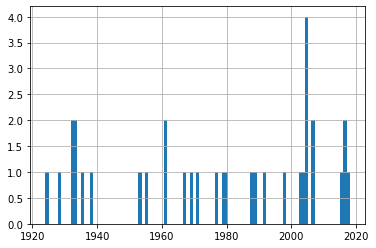

In [75]:
### Your code here
import seaborn as sns

# hurricane_df['years'].value_counts().sort_index().plot()


# hurricane_df['years'].hist()

hurricane_df['years'].hist(bins=hurricane_df['years'].max()-hurricane_df['years'].min()+1)



#### Exercise 4

You believe that knowing how often each of the areas of the Atlantic are affected by these strong hurricanes is important for making preparations for future hurricanes.

Counts how often each area is listed as an affected area of a hurricane.

For example `{"Cayman Islands": 10, "Jamaica": 20, ...}`

*Hint: Think out of `pandas`!*

In [76]:
### Your code here

pd.Series(hurricane_df['areas_affected'].sum()).value_counts()

Central America                                            9
The Caribbean                                              8
Mexico                                                     7
The Bahamas                                                7
Cuba                                                       6
Florida                                                    6
United States Gulf Coast                                   6
Texas                                                      4
Lesser Antilles                                            4
Jamaica                                                    4
United States East Coast                                   3
Venezuela                                                  3
Yucatn Peninsula                                           3
Atlantic Canada                                            3
Greater Antilles                                           2
Bermuda                                                    2
Northeastern United Stat

In [77]:
hurricane_df['areas_affected'].explode().value_counts()

Central America                                            9
The Caribbean                                              8
Mexico                                                     7
The Bahamas                                                7
Cuba                                                       6
Florida                                                    6
United States Gulf Coast                                   6
Texas                                                      4
Lesser Antilles                                            4
Jamaica                                                    4
United States East Coast                                   3
Venezuela                                                  3
Yucatn Peninsula                                           3
Atlantic Canada                                            3
Greater Antilles                                           2
Bermuda                                                    2
Northeastern United Stat

In [78]:
from collections import Counter

Counter(hurricane_df['areas_affected'].sum())

Counter({'Central America': 9,
         'Mexico': 7,
         'Cuba': 6,
         'Florida': 6,
         'The Bahamas': 7,
         'Lesser Antilles': 4,
         'United States East Coast': 3,
         'Atlantic Canada': 3,
         'Northeastern United States': 2,
         'Jamaica': 4,
         'Cayman Islands': 1,
         'Bermuda': 2,
         'Texas': 4,
         'Tamaulipas': 1,
         'Yucatn Peninsula': 3,
         'Georgia': 1,
         'The Carolinas': 1,
         'Virginia': 1,
         'Southeastern United States': 1,
         'Southwestern Quebec': 1,
         'New England': 1,
         'Louisiana': 1,
         'Midwestern United States': 1,
         'The Caribbean': 8,
         'United States Gulf Coast': 6,
         'United States East coast': 1,
         'South Texas': 1,
         'Venezuela': 3,
         'Hispaniola': 1,
         'South Florida': 1,
         'Greater Antilles': 2,
         'Bahamas': 2,
         'Eastern United States': 1,
         'Ontario': 1,
  

#### Exercise 5

Find the hurricane that caused the greatest number of deaths, and how many deaths it caused.


In [79]:
### Your code here

hurricane_df.sort_values('deaths',ascending=False)

,names,months,years,max_sustained_winds,areas_affected,damages,deaths,damages_num
21,Mitch,October,1998,180,"[Central America, Yucatn Peninsula, South Flor...",6.2B,19325,6.200000e+09
1,San Felipe II Okeechobee,September,1928,160,"[Lesser Antilles, The Bahamas, United States E...",100M,4000,1.000000e+08
3,Cuba II,November,1932,175,"[Lesser Antilles, Jamaica, Cayman Islands, Cub...",40M,3103,4.000000e+07
32,Maria,September,2017,175,"[Lesser Antilles, Virgin Islands, Puerto Rico,...",91.6B,3057,9.160000e+10
16,David,August,1979,175,"[The Caribbean, United States East coast]",1.54B,2068,1.540000e+09
25,Katrina,August,2005,175,"[Bahamas, United States Gulf Coast]",125B,1836,1.250000e+11
9,Janet,September,1955,175,"[Lesser Antilles, Central America]",65.8M,1023,6.580000e+07
12,Beulah,September,1967,160,"[The Caribbean, Mexico, Texas]",208M,688,2.080000e+08
7,New England,September,1938,160,"[Southeastern United States, Northeastern Unit...",306M,682,3.060000e+08
30,Matthew,October,2016,165,"[Antilles, Venezuela, Colombia, United States ...",15.1B,603,1.510000e+10


#### Exercise 6


Just as hurricanes are rated by their windspeed, you want to try rating hurricanes based on other metrics.

Write a function that rates hurricanes on a mortality scale according to the following ratings, where the key is the rating and the value is the upper bound of deaths for that rating.

```
mortality_scale = {
    0: 0,
    1: 100,
    2: 500,
    3: 1000,
    4: 10000
}
```

For example, a hurricane with a 1 mortality rating would have resulted in greater than 0 but less than or equal to 100 deaths. A hurricane with a 5 mortality rating would have resulted in greater than 10000 deaths.

1. Create a series that stores the mortality scale.
2. Create a barplot where the x-axis are the mortality numbers, and the y-axis is the number of hurricans fall into the group.

<AxesSubplot:>

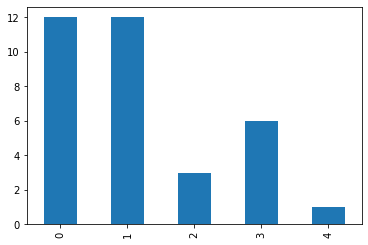

In [90]:
### Your code here
def mortality_scale(s):
    if s<100:
        rate=0
    elif s<500:
        rate=1
    elif s<1000:
        rate=2
    elif s<10000:
        rate=3
    else:
        rate=4
    return rate

hurricane_df['deaths'].apply(mortality_scale).value_counts().sort_index().plot.bar()

#### Exercise 7

Besides mortality, you want to rate hurricanes according to how much damage they cause.

```
damage_scale = {
    0: 0,
    1: 100000000,
    2: 1000000000,
    3: 10000000000,
    4: 50000000000
}
```
                
For example, a hurricane with a 1 damage rating would have resulted in damages greater than 0 USD but less than or equal to 100000000 USD. A hurricane with a 5 damage rating would have resulted in damages greater than 50000000000 USD (talk about a lot of money).

1. Create a series that stores the damage scale.
2. Create a barplot where the x-axis are the death scale numbers, and the y-axis is the number of hurricans fall into the group.

<AxesSubplot:>

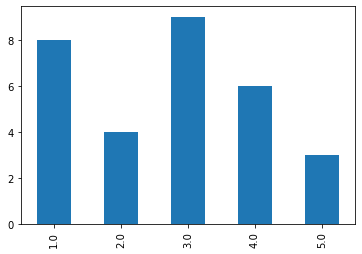

In [93]:
### Your code here
def damage_scale(v):
    if v==0:
        return 0
    if v <= 100000000:
        return 1
    if v<=1000000000:
        return 2
    if v<=10000000000:
        return 3
    if v<= 50000000000:
        return 4
    if v>=50000000000:
        return 5
    return np.nan


hurricane_df['damages_num'].apply(damage_scale).value_counts().sort_index().plot.bar()


### Exercise 8

We are interested in the relationship between
- Mortality scale and
- Damage scale

Create a scattered plot to show the relationship between the two.

Are they highly correlated or uncorrelated?

<AxesSubplot:xlabel='damage_scale', ylabel='mortality_scale'>

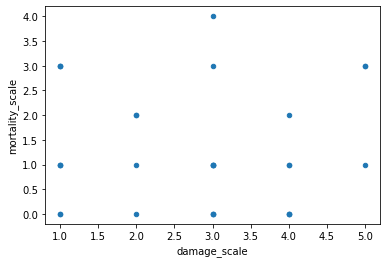

In [94]:
### Your code here

hurricane_df['damage_scale']=hurricane_df['damages_num'].apply(damage_scale)
hurricane_df['mortality_scale']=hurricane_df['deaths'].apply(mortality_scale)

hurricane_df.plot.scatter(x='damage_scale',y='mortality_scale')

